In [1]:
from piquery.piquery import PIQBuilder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = PIQBuilder.buildDb()

In [6]:
from time import time

start_time = time()

df = db.read_sql('SELECT `hash`, COUNT(*) AS hash_num FROM case_art_image_distinct GROUP BY `hash` ORDER BY hash_num DESC')

print('query db cost time: {}'.format(time() - start_time))

query db cost time: 354.44176483154297


In [7]:
df.shape

(38078, 2)

In [289]:
list(df[df.hash_num > 50000].index)

['eee0',
 'eec0',
 'ee60',
 'ee40',
 'ef60',
 '6e60',
 'ee80',
 'ef40',
 'eea0',
 'efc0',
 '6ee0',
 'efe0',
 'cee0',
 'cec0',
 'ee20',
 'ee00',
 'ef00',
 'ef80']

In [36]:
df['hash_num'].sum()

8113104

In [35]:
df.loc[df.hash_num > 50000]

,hash_num
hash,
eee0,455553
eec0,334067
ee60,316051
ee40,196897
ef60,103654
6e60,101967
ee80,98925
ef40,98337
eea0,96725


In [30]:
df.set_index('hash', inplace=True)

In [33]:
df['hash_num'].plot.pie()

In [143]:
def split_df(sl):
    total = df['hash_num'].sum()

    df1 = df.loc[df.hash_num > sl]
    num1 = df1['hash_num'].sum()

    # hash_num1 = df1.shape[0]
    # hash_total = df.shape[0]

    df2 = df.loc[~(df.hash_num > sl)]
    num2 = df2['hash_num'].sum()
    # hash_num2 = df2.shape[0]

    others = pd.DataFrame({ 'hash_num': [int(num2)] }, index=['others'])

    print('total: {}\n'.format(total))
    print('> {}:\n\t{}\tpercent: {}%\nothers:\n\t{}\tpercent: {}%'.format(sl, num1, round(100*num1/total, 3), num2, round(100*num2/total, 3)))
    return df1.append(others)
    # return num1/total, hash_num1/hash_total, num2/total, hash_num2/hash_total

total: 8113104

> 125000:
	1302568	percent: 16.055%
others:
	6810536	percent: 83.945%


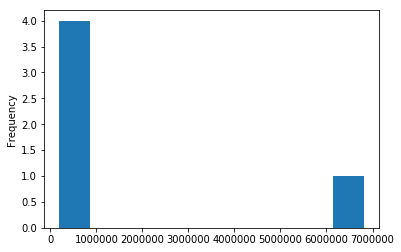

In [175]:
# split_df(125000)['hash_num'].plot.pie(figsize=(8, 8), fontsize=20, autopct='%.1f%%')
split_df(125000)['hash_num'].plot.hist()
plt.show()

In [109]:
others = pd.DataFrame({ 'hash_num': [int(df.loc[~(df.hash_num > 100000)]['hash_num'].sum())] }, index=['others'])

others

,hash_num
others,6604915


In [94]:
df.loc[~(df.hash_num > 100000)]['hash_num']

hash
ee80    98925
ef40    98337
eea0    96725
efc0    95596
6ee0    95551
efe0    83837
cee0    80242
cec0    80016
ee20    78657
ee00    63226
ef00    57442
ef80    50961
e660    49322
ef20    48385
6f60    46635
ecc0    43609
6ec0    40640
ece0    40402
eec4    37063
efa0    36412
e6e0    34042
6e40    31869
4ee0    30088
ee44    29804
ee64    29182
ce60    28628
6fe0    27501
ee84    26960
eee4    26933
ce40    26104
        ...  
96f7        1
c4d7        1
841d        1
7f2e        1
e5d3        1
2c25        1
3553        1
2b83        1
a7ed        1
53e1        1
b02d        1
2d8b        1
3449        1
353e        1
c94a        1
7637        1
b070        1
fd5d        1
4297        1
1719        1
a862        1
604c        1
f81c        1
5ede        1
7db1        1
7e99        1
d85c        1
05bc        1
e122        1
5ad2        1
Name: hash_num, Length: 38072, dtype: int64

In [177]:
int('f', 16)

15

In [182]:
df.shape[0] / 65536

0.581024169921875

In [188]:
for i in range(0, int('ffff', 16), 2000):
    print(i)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000


In [203]:
# df.loc[df.index]
df.insert(0, 'hash_int', [int(h, 16) for h in list(df.index)])

In [195]:
int(df.index[2], 16)

61024

In [202]:
df.columns.tolist()

['hash_num']

In [206]:
df.to_csv('hash_distribute_int.csv')

In [205]:
int('ee00', 16)

60928

In [207]:
df.head()

,hash_int,hash_num
hash,,
eee0,61152,455553
eec0,61120,334067
ee60,61024,316051
ee40,60992,196897
ef60,61280,103654


In [228]:
def hash_dist(rg):
    s =  rg[1] - rg[0]
    hash_range = list()
    hash_num = list()
    for b in rg:
        ct = df[(df.hash_int>=b) & (df.hash_int<(b+s))]['hash_num'].sum()
        hash_range.append('{}-{}'.format(b, b+s))
        hash_num.append(ct)
    return pd.DataFrame(dict(hash_range=hash_range, hash_num=hash_num))

In [232]:
df_hash_dist = hash_dist(range(0, int('ffff', 16), 2000))

In [234]:
df_hash_dist['hash_num'].sum()

8113104

In [237]:
df_hash_dist['percent'] = df_hash_dist['hash_num'].apply(lambda x:round(x*100/8113104, 2))

In [283]:
df_hash_dist.sort_values('percent', ascending = False)

,range_hex,hash_range,hash_num,percent
30,EA60-F230,60000-62000,3701383,45.62
14,6D60-7530,28000-30000,833897,10.28
26,CB20-D2F0,52000-54000,730334,9.00
29,E290-EA60,58000-60000,557120,6.87
32,FA00-FFFF,64000-66000,376372,4.64
13,6590-6D60,26000-28000,311264,3.84
10,4E20-55F0,20000-22000,241650,2.98
28,DAC0-E290,56000-58000,117442,1.45
1,07D0-0FA0,2000-4000,109761,1.35
22,ABE0-B3B0,44000-46000,102207,1.26


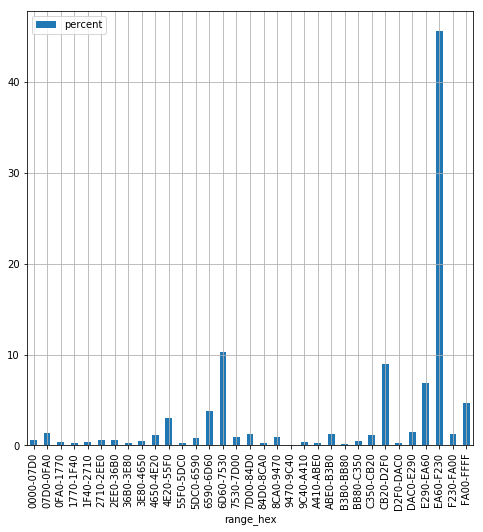

In [282]:
# df_hash_dist.plot(x='hash_range', y='percent', style='or-', grid = True, figsize=(12, 12))
df_hash_dist.plot(kind = 'bar', x='range_hex', y='percent', grid = True, figsize=(8, 8))

In [292]:
df_hash_dist.to_csv('hash_range_distribute.csv', index=False)

In [266]:
def byte2hex(bt):
    hx = hex(bt).split('x')[1]
    if bt < 16:
        return '000' + hx
    elif bt < 256:
        return '00' + hx
    elif bt < 4096:
        return '0' + hx
    elif bt > 65535:
        return 'ffff'
    return hx

['{}-{}'.format(byte2hex(i), byte2hex(i+2000)) for i in range(0, int('ffff', 16), 2000)]

['0000-07d0',
 '07d0-0fa0',
 '0fa0-1770',
 '1770-1f40',
 '1f40-2710',
 '2710-2ee0',
 '2ee0-36b0',
 '36b0-3e80',
 '3e80-4650',
 '4650-4e20',
 '4e20-55f0',
 '55f0-5dc0',
 '5dc0-6590',
 '6590-6d60',
 '6d60-7530',
 '7530-7d00',
 '7d00-84d0',
 '84d0-8ca0',
 '8ca0-9470',
 '9470-9c40',
 '9c40-a410',
 'a410-abe0',
 'abe0-b3b0',
 'b3b0-bb80',
 'bb80-c350',
 'c350-cb20',
 'cb20-d2f0',
 'd2f0-dac0',
 'dac0-e290',
 'e290-ea60',
 'ea60-f230',
 'f230-fa00',
 'fa00-ffff']

In [264]:
hex(4095)

'0xfff'

In [267]:
df_hash_dist.insert(0, 'range_hex', ['{}-{}'.format(byte2hex(i), byte2hex(i+2000)) for i in range(0, int('ffff', 16), 2000)])

,range_hex,hash_range,hash_num,percent
0,0000-07d0,0-2000,44383,0.55
1,07d0-0fa0,2000-4000,109761,1.35
2,0fa0-1770,4000-6000,32961,0.41
3,1770-1f40,6000-8000,17067,0.21
4,1f40-2710,8000-10000,27740,0.34
5,2710-2ee0,10000-12000,47186,0.58
6,2ee0-36b0,12000-14000,43618,0.54
7,36b0-3e80,14000-16000,19367,0.24
8,3e80-4650,16000-18000,34574,0.43
9,4650-4e20,18000-20000,92743,1.14


In [270]:
int('ea60', 16)

60000

In [273]:
hex(60000).split('x')[1].upper()

'EA60'

In [276]:
df_hash_dist['range_hex'] = df_hash_dist['range_hex'].apply(lambda x:x.upper())

In [277]:
df_hash_dist

,range_hex,hash_range,hash_num,percent
0,0000-07D0,0-2000,44383,0.55
1,07D0-0FA0,2000-4000,109761,1.35
2,0FA0-1770,4000-6000,32961,0.41
3,1770-1F40,6000-8000,17067,0.21
4,1F40-2710,8000-10000,27740,0.34
5,2710-2EE0,10000-12000,47186,0.58
6,2EE0-36B0,12000-14000,43618,0.54
7,36B0-3E80,14000-16000,19367,0.24
8,3E80-4650,16000-18000,34574,0.43
9,4650-4E20,18000-20000,92743,1.14


In [15]:
res = db.read('select * from case_art_image_distinct_test where `cid`=289008 and `id`=10899')

In [16]:
if res:
    print('True')
else:
    print('False')

False


In [17]:
bool(res)

False

In [19]:
not not res

False

In [20]:
res